In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from src.datasets.mnist import MNIST, get_mnist, get_rotated_mnist
from src.datasets.fmnist import FashionMNIST, get_fmnist, get_rotated_fmnist
from src.datasets.cifar10 import CIFAR10, get_cifar10, get_cifar10_augmented, get_cifar10_corrupted
from src.datasets.cifar100 import CIFAR100, get_cifar100, get_cifar100_augmented
from src.datasets.svhn import SVHN, get_svhn, get_svhn_augmented
from src.datasets.celeba import CelebA, get_celeba, get_celeba_augmented

/zhome/01/c/173531/miniconda3/envs/gauss/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_loader, valid_loader, test_loader = get_celeba(batch_size = 128)

imgs, _ = next(iter(train_loader))
print("Batch shape", imgs.shape)
print("Batch mean", imgs.mean(axis=(0,1,2)))
print("Batch std", imgs.std(axis=(0,1,2)))

Possible targets are: Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object'), --- 40
There are 18911 images and 202599 targets
Batch shape torch.Size([1000, 218, 178, 3])
Batch mean tensor([0.0022, 0.0029, 0.0039], dtype=torch.float64)
Batch std tensor([0.3113, 0.2914, 0.2909], dtype=torch.float64)


# Test subsampling

Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ../datasets/train_32x32.mat


/zhome/01/c/173531/miniconda3/envs/gauss/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dataset shape (15, 28, 28, 1) (15, 3)


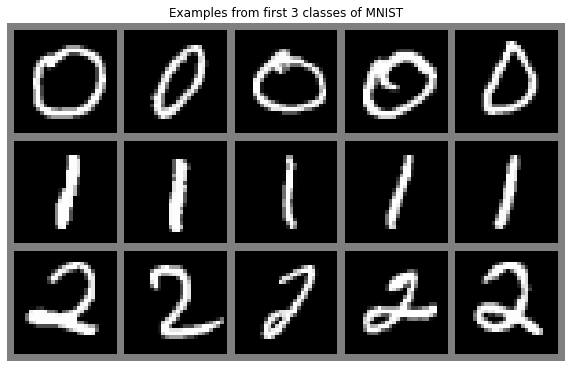

Dataset shape (15, 28, 28, 1) (15, 3)


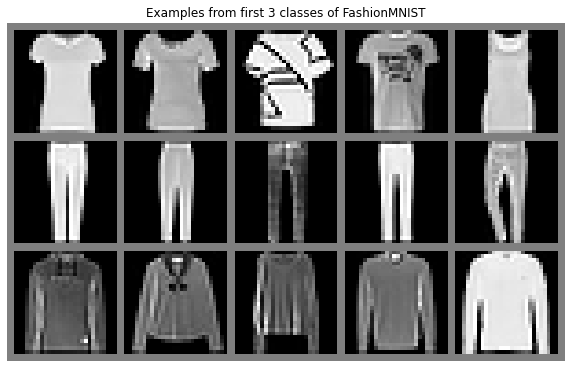

Dataset shape (15, 32, 32, 3) (15, 3)


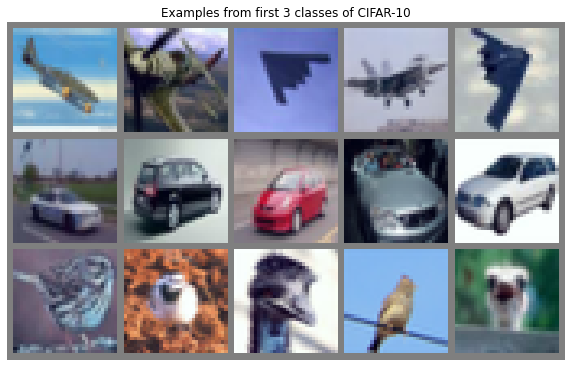

Dataset shape (15, 32, 32, 3) (15, 3)


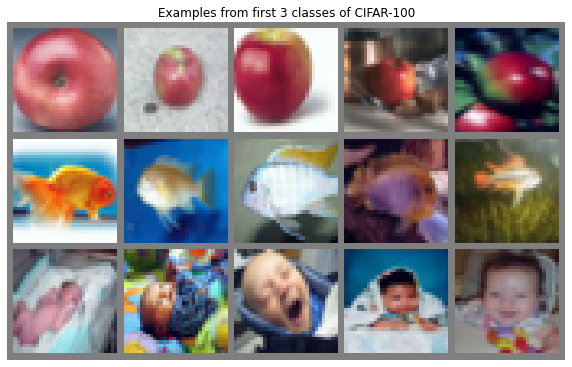

Dataset shape (15, 32, 32, 3) (15, 3)


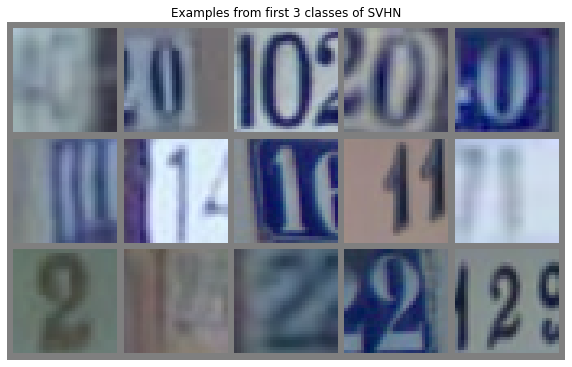

In [3]:
NUM_IMAGES_PER_CLASS = 5
NUM_CLASSES = 3

type_and_datasets = [
    ("MNIST",           MNIST(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
    ("FashionMNIST",    FashionMNIST(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
    ("CIFAR-10",        CIFAR10(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
    ("CIFAR-100",       CIFAR100(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
    ("SVHN",            SVHN(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
]

for dataset_type, dataset in type_and_datasets:
    print("Dataset shape", dataset.data.shape, dataset.targets.shape)
    images = [dataset.data[idx] for idx in range(NUM_IMAGES_PER_CLASS*NUM_CLASSES)]
    imgs = np.stack(images, axis=0)
    imgs = torch.from_numpy(imgs).permute(0, 3, 1, 2)
    img_grid = torchvision.utils.make_grid(imgs, nrow=NUM_IMAGES_PER_CLASS, normalize=True, pad_value=0.5)
    img_grid = img_grid.permute(1, 2, 0)

    plt.figure(figsize=(10,7))
    plt.title(f"Examples from first {NUM_CLASSES} classes of {dataset_type}")
    plt.imshow(img_grid)
    plt.axis('off')
    plt.show()
    plt.close()

# Test dataloaders

/work3/mmia/uncertainty_quantification/src/datasets/mnist.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.targets = torch.nn.functional.one_hot(torch.tensor(self.targets), len(classes)).numpy()
/work3/mmia/uncertainty_quantification/src/datasets/fmnist.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.targets = torch.nn.functional.one_hot(torch.tensor(self.targets), len(classes)).numpy()


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


/work3/mmia/uncertainty_quantification/src/datasets/cifar10.py:183: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.targets = torch.nn.functional.one_hot(torch.tensor(self.targets), len(classes)).numpy()


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ../datasets/train_32x32.mat
Using downloaded and verified file: ../datasets/test_32x32.mat
Using downloaded and verified file: ../datasets/train_32x32.mat
Using downloaded and verified file: ../datasets/test_32x32.mat
Possible targets are: Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 

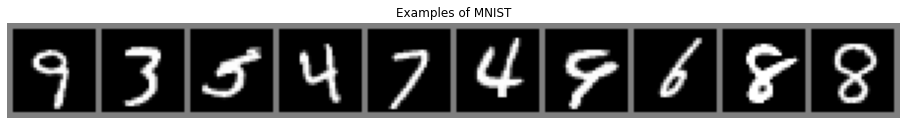

Batch shape torch.Size([128, 28, 28, 1])
Batch mean tensor([0.1281])
Batch std tensor([0.3053])


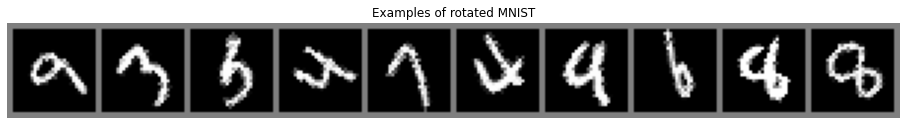

Batch shape torch.Size([128, 28, 28, 1])
Batch mean tensor([0.2968])
Batch std tensor([0.3564])


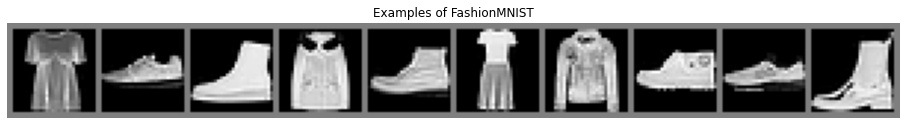

Batch shape torch.Size([128, 28, 28, 1])
Batch mean tensor([0.2907])
Batch std tensor([0.3558])


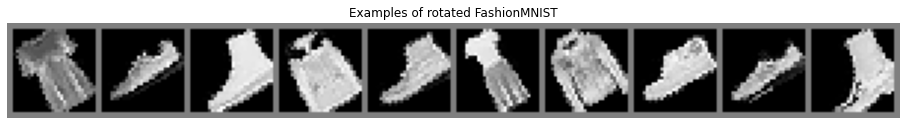

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([ 0.0174, -0.0062, -0.0266])
Batch std tensor([0.9863, 1.0060, 1.0073])


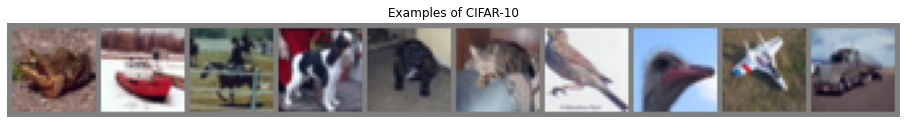

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([ 0.0105, -0.0180, -0.0381])
Batch std tensor([0.9574, 0.9774, 0.9816])


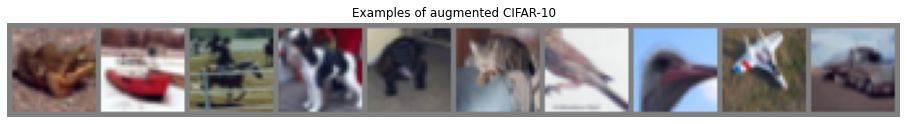

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([-0.0265, -0.0258, -0.0367])
Batch std tensor([0.9917, 1.0039, 0.9952])


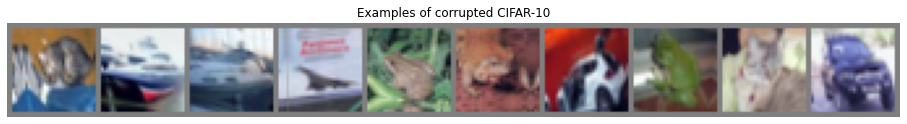

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([-0.0029,  0.0079,  0.0386])
Batch std tensor([1.0568, 1.0334, 1.0587])


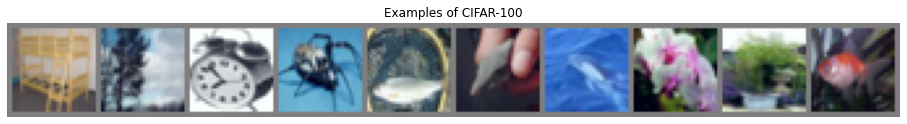

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([0.0035, 0.0010, 0.0287])
Batch std tensor([1.0296, 1.0054, 1.0338])


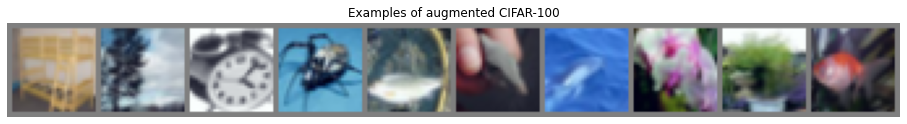

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([-0.1670, -0.0287,  0.3055])
Batch std tensor([0.9123, 0.9646, 0.9531])


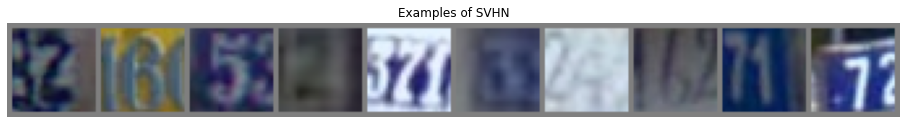

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([-0.1690, -0.0271,  0.3123])
Batch std tensor([0.9030, 0.9530, 0.9457])


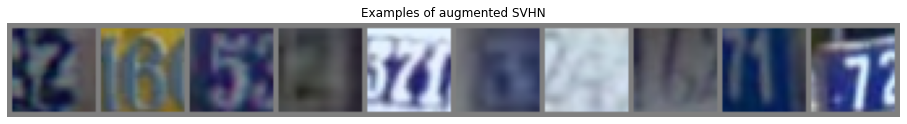

Batch shape torch.Size([128, 218, 178, 3])
Batch mean tensor([-0.0088, -0.0075, -0.0017], dtype=torch.float64)
Batch std tensor([0.3251, 0.2949, 0.2961], dtype=torch.float64)


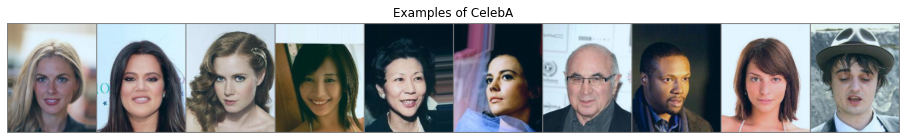

In [4]:
NUM_IMAGES = 10
NUM_COLUMNS = 10

type_and_loaders = [
    ("MNIST", get_mnist(batch_size = 128)),
    ("rotated MNIST", get_rotated_mnist(angle = 50, batch_size = 128)),
    ("FashionMNIST", get_fmnist(batch_size = 128)),
    ("rotated FashionMNIST", get_rotated_fmnist(angle = 30, batch_size = 128)),
    ("CIFAR-10", get_cifar10(batch_size = 128)),
    ("augmented CIFAR-10", get_cifar10_augmented(batch_size = 128)),
    ("corrupted CIFAR-10", get_cifar10_corrupted("elastic_transform", severity_level=1, batch_size = 128)),
    ("CIFAR-100", get_cifar100(batch_size = 128)),
    ("augmented CIFAR-100", get_cifar100_augmented(batch_size = 128)),
    ("SVHN", get_svhn(batch_size = 128)),
    ("augmented SVHN", get_svhn_augmented(batch_size = 128)),
    ("CelebA", get_celeba(batch_size = 128)),
    ("augmented CelebA", get_celeba_augmented(batch_size = 128)),
]

for dataset_type, loader in type_and_loaders:
    train_loader, valid_loader, test_loader = loader
    if dataset_type == "corrupted CIFAR-10":
        train_loader = test_loader

    imgs, _ = next(iter(train_loader))
    print("Batch shape", imgs.shape)
    print("Batch mean", imgs.mean(axis=(0,1,2)))
    print("Batch std", imgs.std(axis=(0,1,2)))

    images = [train_loader.dataset[idx][0] for idx in range(NUM_IMAGES)]
    imgs = np.stack(images, axis=0)
    imgs = torch.from_numpy(imgs).permute(0, 3, 1, 2)
    img_grid = torchvision.utils.make_grid(imgs, nrow=NUM_COLUMNS, normalize=True, pad_value=0.5)
    img_grid = img_grid.permute(1, 2, 0)

    plt.figure(figsize=(16,5))
    plt.title(f"Examples of {dataset_type}")
    plt.imshow(img_grid)
    plt.axis('off')
    plt.show()
    plt.close()